## Importing Webpage of IMDB to HTML

In [1]:
from requests import get
from bs4 import BeautifulSoup
url = 'https://www.imdb.com/list/ls008706900/'

response = get(url)
print(response.text[:200])






<!DOCTYPE html>
<html
xmlns:og="http://ogp.me/ns#"
xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" con


In [2]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_headers = html_soup.find_all('div', class_ = 'lister-item mode-detail')
print(type(movie_headers))
print(len(movie_headers))

<class 'bs4.element.ResultSet'>
100


### Analysis of HTML script to scrape data

In [46]:
first_movie = movie_headers[0]
first_movie

<div class="lister-item mode-detail">
<div class="lister-item-image ribbonize" data-tconst="tt0073707">
<a href="/title/tt0073707/?ref_=ttls_li_i"> <img alt="Sholay" class="loadlate" data-tconst="tt0073707" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMjEzOTM4MTY1Nl5BMl5BanBnXkFtZTgwOTc0MjkwMzE@._V1_UY209_CR9,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="140"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0073707/?ref_=ttls_li_tt">Sholay</a>
<span class="lister-item-year text-muted unbold">(1975)</span>
</h3>
<p class="text-muted text-small">
<span class="certificate">Not Rated</span>
<span class="ghost">|</span>
<span class="runtime">198 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Comedy            </span>
</p>
<div class="ipl-rating-wi

In [47]:
first_movie.div

<div class="lister-item-image ribbonize" data-tconst="tt0073707">
<a href="/title/tt0073707/?ref_=ttls_li_i"> <img alt="Sholay" class="loadlate" data-tconst="tt0073707" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMjEzOTM4MTY1Nl5BMl5BanBnXkFtZTgwOTc0MjkwMzE@._V1_UY209_CR9,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="140"/>
</a> </div>

In [48]:
first_movie.a

<a href="/title/tt0073707/?ref_=ttls_li_i"> <img alt="Sholay" class="loadlate" data-tconst="tt0073707" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMjEzOTM4MTY1Nl5BMl5BanBnXkFtZTgwOTc0MjkwMzE@._V1_UY209_CR9,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="140"/>
</a>

In [49]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0073707/?ref_=ttls_li_tt">Sholay</a>
<span class="lister-item-year text-muted unbold">(1975)</span>
</h3>

In [50]:
first_movie.h3.a

<a href="/title/tt0073707/?ref_=ttls_li_tt">Sholay</a>

In [51]:
first_name = first_movie.h3.a.text
first_name

'Sholay'

In [52]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(1975)</span>

In [53]:
first_year = first_year.text
first_year

'(1975)'

In [54]:
first_movie.p

<p class="text-muted text-small">
<span class="certificate">Not Rated</span>
<span class="ghost">|</span>
<span class="runtime">198 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Comedy            </span>
</p>

In [55]:
first_runtime = first_movie.p.find('span', class_ = 'runtime')
first_runtime

<span class="runtime">198 min</span>

In [56]:
first_runtime = first_runtime.text
first_runtime_min = first_runtime[0:3]
first_runtime_min

'198'

In [57]:
first_gen = first_movie.p.find('span', class_ = 'genre')
first_gen = first_gen.text
first_genre = first_gen[1:26]
first_genre

'Action, Adventure, Comedy'

In [58]:
first_movie.div

<div class="lister-item-image ribbonize" data-tconst="tt0073707">
<a href="/title/tt0073707/?ref_=ttls_li_i"> <img alt="Sholay" class="loadlate" data-tconst="tt0073707" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMjEzOTM4MTY1Nl5BMl5BanBnXkFtZTgwOTc0MjkwMzE@._V1_UY209_CR9,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB499613450_.png" width="140"/>
</a> </div>

In [59]:
first_rating_cont = first_movie.find('span', attrs = {'class':'ipl-rating-star__rating'})
first_rating_cont

<span class="ipl-rating-star__rating">8.2</span>

In [60]:
first_imdb = float(first_rating_cont.text)
first_imdb

8.2

In [61]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes


<span data-value="43462" name="nv">43,462</span>

In [62]:
first_votes['data-value']

'43462'

In [63]:
first_votes = int(first_votes['data-value'])
first_votes

43462

### Adding data pf top 100 movies in a list

In [64]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
votes = []
runtimes = []
genres = []
# Extract data from individual movie container
for item in movie_headers:
        # The name
        name = item.h3.a.text
        names.append(name)
        
        # The year
        year = item.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
        years.append(year[1:5])
        
        # The IMDB rating
        imdb = float(item.find('span', attrs = {'class':'ipl-rating-star__rating'}).text)
        imdb_ratings.append(imdb)

        # The number of votes
        vote = item.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))
        
        # The Runtime duration   
        if item.p.find('span', class_ = 'runtime') is not None:
            runtime = item.p.find('span', class_ = 'runtime').text
            runtimes.append(float(runtime[0:3]))
        else:
            runtimes.append('nan')

       #The genres   
        if item.p.find('span', class_ = 'genre') is not None:
            genre = item.p.find('span', class_ = 'genre').text
            genres.append(genre[1:])
        else:
            genres.append('nan')        
    

### Adding rest movies in top 100 - 200

In [65]:
url = 'https://www.imdb.com/list/ls008706900/?sort=list_order,asc&st_dt=&mode=detail&page=2'
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')
movie_headers = html_soup.find_all('div', class_ = 'lister-item mode-detail')

In [66]:
for item in movie_headers:
        # The name
        name = item.h3.a.text
        names.append(name)
        
        # The year
        year = item.h3.find('span', class_ = 'lister-item-year text-muted unbold').text
        years.append(year[1:5])
        
        # The IMDB rating
        imdb = float(item.find('span', attrs = {'class':'ipl-rating-star__rating'}).text)
        imdb_ratings.append(imdb)

        # The number of votes
        vote = item.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))
        
        # The Runtime duration   
        if item.p.find('span', class_ = 'runtime') is not None:
            runtime = item.p.find('span', class_ = 'runtime').text
            runtimes.append(float(runtime[0:3]))
        else:
            runtimes.append('nan')

       #The genres   
        if item.p.find('span', class_ = 'genre') is not None:
            genre = item.p.find('span', class_ = 'genre').text
            genres.append(genre[1:])
        else:
            genres.append('nan')        
    

#### Required Dataframe

In [67]:
import pandas as pd

test_df = pd.DataFrame({'Movie Title': names,
                       'Year of release': years,
                      'IMDB rating': imdb_ratings,
                     'Running_time_min': runtimes,
                      'Number of Votes': votes,
                        'Genre':genres
                       })
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Genre               200 non-null object
IMDB rating         200 non-null float64
Movie Title         200 non-null object
Number of Votes     200 non-null int64
Running_time_min    200 non-null object
Year of release     200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [68]:
test_df.head(20)

,Genre,IMDB rating,Movie Title,Number of Votes,Running_time_min,Year of release
0,"Action, Adventure, Comedy",8.2,Sholay,43462,198,1975
1,"Action, Crime, Drama",8.1,Deewaar,8193,174,1975
2,"Crime, Drama, Romance",7.7,Haasil,2263,160,2003
3,"Drama, Family, Musical",8.5,Masoom,2939,165,1983
4,"Comedy, Drama, Musical",8.2,Munna Bhai M.B.B.S.,58970,156,2003
5,"Comedy, Drama",8.3,Rang De Basanti,93108,157,2006
6,"Action, Crime, Drama",7.7,Agneepath,6836,174,1990
7,Drama,8.8,Anand,19598,122,1971
8,"Comedy, Drama, Romance",8.2,Jo Jeeta Wohi Sikandar,17963,174,1992
9,"Action, Crime, Drama",8.2,Satya,10464,170,1998


In [69]:
test_df.columns

Index(['Genre', 'IMDB rating', 'Movie Title', 'Number of Votes',
       'Running_time_min', 'Year of release'],
      dtype='object')

In [70]:
df = test_df[['Movie Title','IMDB rating','Year of release','Running_time_min','Genre','Number of Votes' ]]

In [71]:
df['Year of release'][192]

'I) ('

In [72]:
df['Year of release'][192] = df['Year of release'][192].replace('I) (','1997')

/home/amit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/amit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [73]:
df['Year of release'][192]

'1997'

In [74]:
df

,Movie Title,IMDB rating,Year of release,Running_time_min,Genre,Number of Votes
0,Sholay,8.2,1975,198,"Action, Adventure, Comedy",43462
1,Deewaar,8.1,1975,174,"Action, Crime, Drama",8193
2,Haasil,7.7,2003,160,"Crime, Drama, Romance",2263
3,Masoom,8.5,1983,165,"Drama, Family, Musical",2939
4,Munna Bhai M.B.B.S.,8.2,2003,156,"Comedy, Drama, Musical",58970
5,Rang De Basanti,8.3,2006,157,"Comedy, Drama",93108
6,Agneepath,7.7,1990,174,"Action, Crime, Drama",6836
7,Anand,8.8,1971,122,Drama,19598
8,Jo Jeeta Wohi Sikandar,8.2,1992,174,"Comedy, Drama, Romance",17963
9,Satya,8.2,1998,170,"Action, Crime, Drama",10464


In [75]:
df.to_csv('Top200_Movies.csv')

## Analysis and Visualizations

In [76]:
import numpy as np

In [77]:
df.shape

(200, 6)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Movie Title         200 non-null object
IMDB rating         200 non-null float64
Year of release     200 non-null object
Running_time_min    200 non-null object
Genre               200 non-null object
Number of Votes     200 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [79]:
df.describe(include=["O"])

,Movie Title,Year of release,Running_time_min,Genre
count,200,200,200,200
unique,200,58,80,77
top,Sarfarosh,1983,nan,"Action, Crime, Drama"
freq,1,7,8,23


In [80]:
df.describe()

,IMDB rating,Number of Votes
count,200.000000,200.000000
mean,7.609500,9514.205000
std,0.605552,25447.111128
min,5.600000,17.000000
25%,7.200000,537.000000
50%,7.700000,1647.500000
75%,8.100000,8259.000000
max,8.800000,273304.000000


### Check for Missing Values

In [81]:
# df[(df['Running_time_min'] == 'nan')] 

In [82]:
# df[(df['Genre'] == 'nan')] 

In [83]:
df['Running_time_min'] = df.Running_time_min.replace('nan',np.nan)

In [84]:
df['Genre'] = df.Genre.replace('nan','NA')

In [85]:
df.isnull().sum()

Movie Title         0
IMDB rating         0
Year of release     0
Running_time_min    8
Genre               0
Number of Votes     0
dtype: int64

In [86]:
#  df['Genre'][0]

In [87]:
# from IPython.core.magic import register_line_magic

# @register_line_magic
# def pip(args):
#     """Use pip from the current kernel"""
#     from pip import main
#     main(args.split())


In [88]:
# %pip install wordcloud

## Visualization

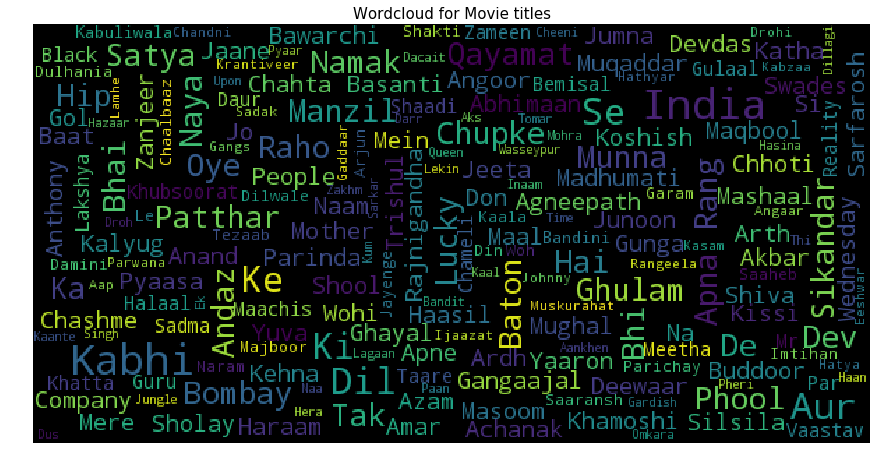

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

names = df['Movie Title']
wordcloud = WordCloud(max_font_size=30, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("Wordcloud for Movie titles", fontsize=15)
plt.axis("off")
plt.show() 

In [90]:
df.nunique()

Movie Title         200
IMDB rating          30
Year of release      58
Running_time_min     79
Genre                77
Number of Votes     196
dtype: int64

In [91]:
print(list(range(5,9,1)))

[5, 6, 7, 8]


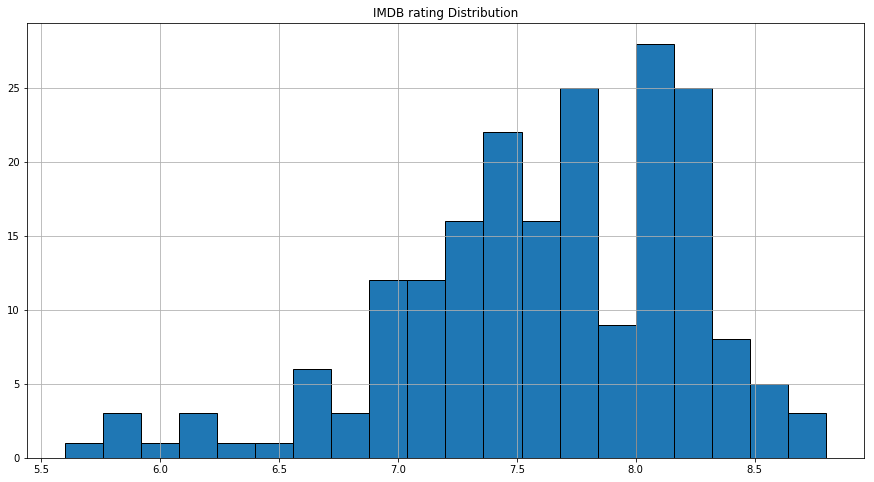

In [92]:
plt.subplots(figsize=(15,8))
df['IMDB rating'].hist(bins=20,edgecolor='black')
plt.xticks([5.5,6, 6.5,7 ,7.5, 8, 8.5])
plt.title('IMDB rating Distribution')
plt.show() 

In [93]:
df = df.set_index('Movie Title')

In [94]:
df.head()

,IMDB rating,Year of release,Running_time_min,Genre,Number of Votes
Movie Title,,,,,
Sholay,8.2,1975,198.0,"Action, Adventure, Comedy",43462
Deewaar,8.1,1975,174.0,"Action, Crime, Drama",8193
Haasil,7.7,2003,160.0,"Crime, Drama, Romance",2263
Masoom,8.5,1983,165.0,"Drama, Family, Musical",2939
Munna Bhai M.B.B.S.,8.2,2003,156.0,"Comedy, Drama, Musical",58970


In [95]:
print ('Top 20 highly rated movies are \n', df.sort_values('IMDB rating',ascending = False)['IMDB rating'].head(20))

Top 20 highly rated movies are 
 Movie Title
Anand                     8.8
Pushpak                   8.7
Koshish                   8.7
Gol Maal                  8.6
Chupke Chupke             8.5
Pyaasa                    8.5
Masoom                    8.5
Sadma                     8.5
Do Bigha Zamin            8.4
Angoor                    8.4
Jagte Raho                8.4
Sahib Bibi Aur Ghulam     8.4
Taare Zameen Par          8.4
3 Idiots                  8.4
Chhoti Si Baat            8.4
Mughal-E-Azam             8.4
Khosla Ka Ghosla!         8.3
Swades: We, the People    8.3
Ijaazat                   8.3
Rang De Basanti           8.3
Name: IMDB rating, dtype: float64


In [96]:
print ('Top 20 most voted movies are \n', df.sort_values('Number of Votes',ascending = False)['Number of Votes'].head(20))

Top 20 most voted movies are 
 Movie Title
3 Idiots                             273304
Taare Zameen Par                     124544
Rang De Basanti                       93108
Lagaan: Once Upon a Time in India     86878
Swades: We, the People                69456
A Wednesday                           62913
Gangs of Wasseypur                    61826
Chak De! India                        61367
Munna Bhai M.B.B.S.                   58970
Dil Chahta Hai                        57431
Dilwale Dulhania Le Jayenge           53786
Sholay                                43462
Andaz Apna Apna                       42792
Lage Raho Munna Bhai                  35139
Black                                 29139
Paan Singh Tomar                      27367
Dev.D                                 24340
Dil Se..                              22913
Sarfarosh                             20631
Anand                                 19598
Name: Number of Votes, dtype: int64


In [97]:
# df.sort_values('Number of Votes',ascending = False)['Number of Votes'].head(20).plot.bar()
# plt.show()

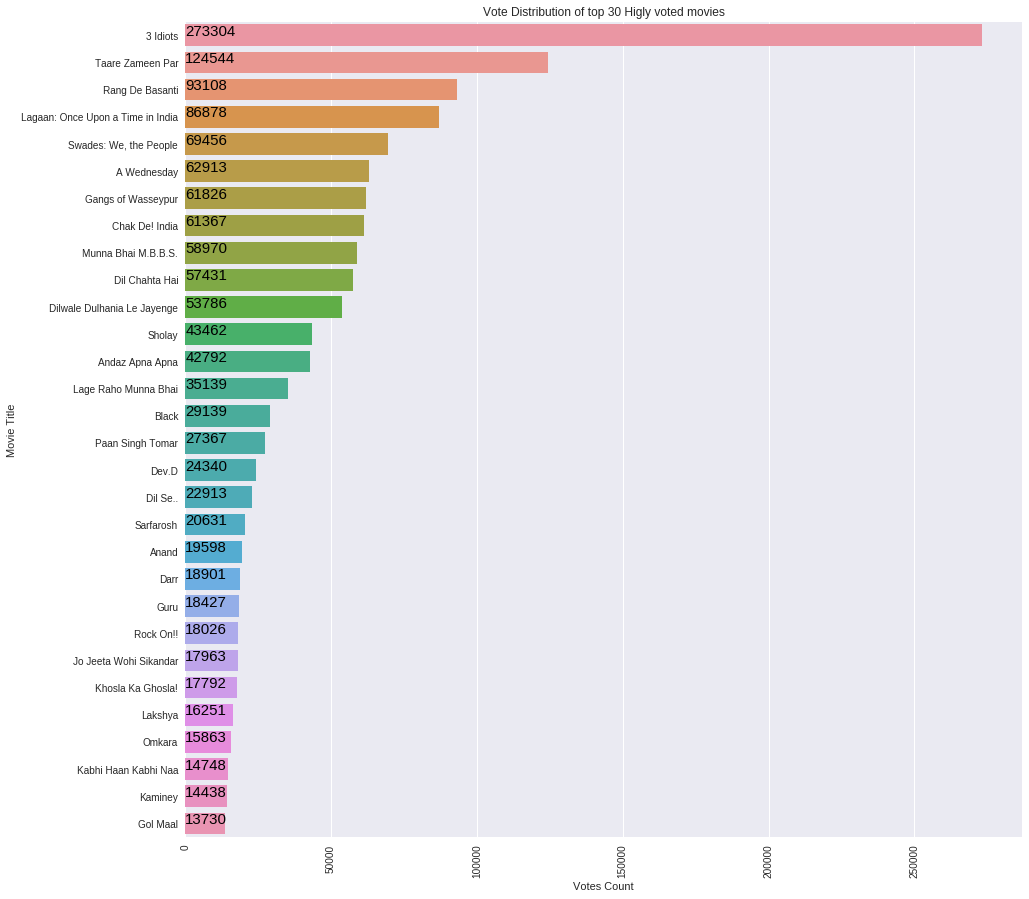

In [98]:
import seaborn as sns 
plt.figure(figsize=(15,15))
sector_name = df.sort_values('Number of Votes',ascending = False)['Number of Votes'].head(30)
sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(0.8,i,v,color='k',fontsize=15)
plt.xticks(rotation='vertical')
plt.xlabel('Votes Count')
plt.ylabel('Movie Title')
plt.title("Vote Distribution of top 30 Higly voted movies")
plt.show()

In [99]:
df.Running_time_min = df.Running_time_min.astype(float)

In [100]:
df.Running_time_min.describe()

count    192.000000
mean     152.432292
std       25.383459
min       93.000000
25%      135.000000
50%      153.000000
75%      166.250000
max      321.000000
Name: Running_time_min, dtype: float64

In [101]:
print ('Top 5 longest movies are \n', df.sort_values('Running_time_min',ascending = False)['Running_time_min'].head(5))

Top 5 longest movies are 
 Movie Title
Gangs of Wasseypur                   321.0
Lagaan: Once Upon a Time in India    224.0
Swades: We, the People               210.0
Sholay                               198.0
Mughal-E-Azam                        197.0
Name: Running_time_min, dtype: float64


In [102]:
print ('Top 5 shortest movies are \n', df.sort_values('Running_time_min',ascending = True)['Running_time_min'].head(5))

Top 5 shortest movies are 
 Movie Title
Parwana         93.0
Achanak         96.0
A Wednesday    104.0
Madhumati      110.0
Rajnigandha    110.0
Name: Running_time_min, dtype: float64


In [103]:
print('Average Running time of bollywood movies is',df.Running_time_min.mean(), 'minutes. ')

Average Running time of bollywood movies is 152.43229166666666 minutes. 


In [104]:
df[['Number of Votes','IMDB rating','Running_time_min']].corr()

,Number of Votes,IMDB rating,Running_time_min
Number of Votes,1.000000,0.308614,0.229092
IMDB rating,0.308614,1.000000,0.023868
Running_time_min,0.229092,0.023868,1.000000
